- Run first notebook before using this one
- Restart the docker otherwise GPU will be full ( CTRL+C in the terminal, then *docker-compose down && docker-compose up* )
- [Official HuggingFace tutorial](https://huggingface.co/blog/stable_diffusion)

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2070 with Max-Q Design (UUID: GPU-aca8bd41-49a8-1728-e44f-9c99a5279226)


In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from time import time
from slugify import slugify

- Load model from disk (you only have it if you ran successfully the first notebook)

In [3]:
torch.cuda.empty_cache()
model = StableDiffusionPipeline.from_pretrained(
    'models/stable-diffusion-v1.5',
    revision='fp16',
    torch_dtype=torch.float16
)
model.to('cuda')
model.enable_attention_slicing()
model.device

device(type='cuda', index=0)

- Disable safety filters (at your own risk!)

In [4]:
model.safety_checker = (lambda images, clip_input: (images, False))

- Set random seed for repeatability

In [5]:
seed_generator = torch.Generator('cuda').manual_seed(42)

- Generate images from prompt

  0%|          | 0/51 [00:00<?, ?it/s]

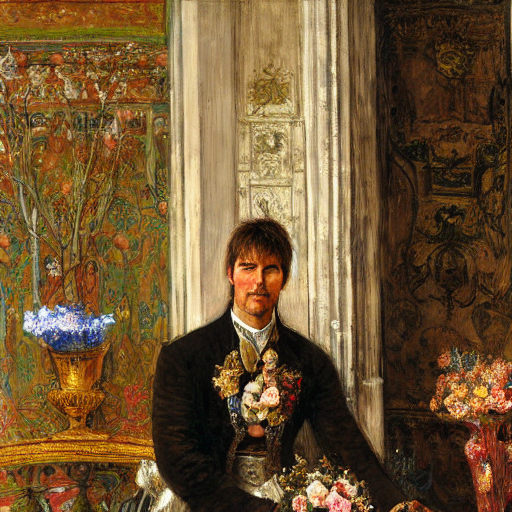

  0%|          | 0/51 [00:00<?, ?it/s]

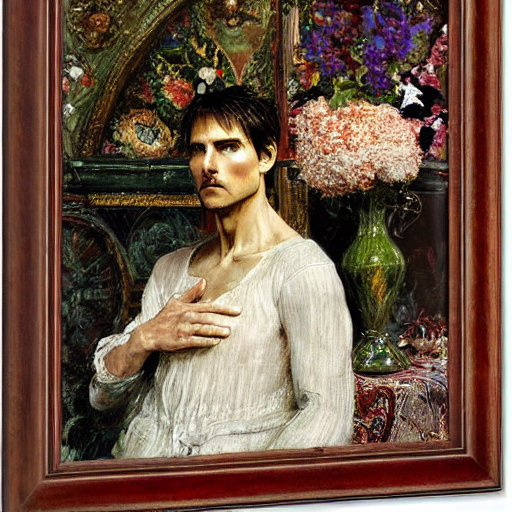

  0%|          | 0/51 [00:00<?, ?it/s]

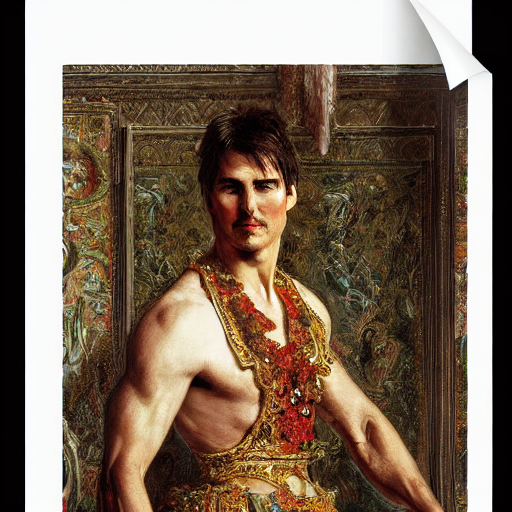

  0%|          | 0/51 [00:00<?, ?it/s]

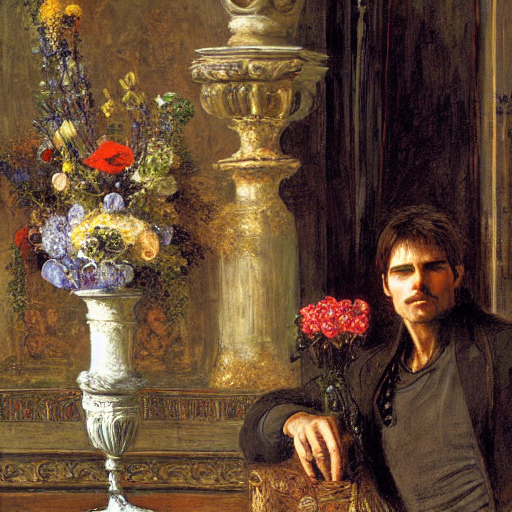

  0%|          | 0/51 [00:00<?, ?it/s]

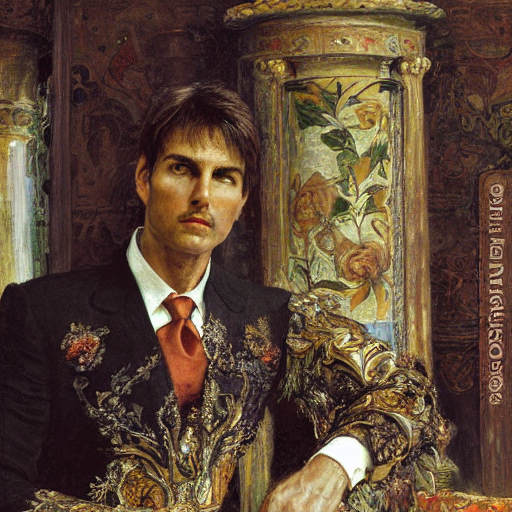

In [6]:
def make_n_images(prompt, repetitions=10):

    with autocast('cuda'):
        for r in range(repetitions):
            output = model(
                prompt,
                generator=seed_generator,
                num_inference_steps=50, # diffusion iterations
                guidance_scale=7.5,     # adherence to text, default 7.5
                width=512,
                height=512,
            )

            image = output.images[0]
            image.save(f'images/{time()}_{slugify(prompt[:100])}.png')
            display(image)
            
            
# prompt = "Sir John Everett Millais Fat Ophelia 1851 Tate"

# prompt = "digital painting of a woman very detailed face and her bonzai inside lushious Palm house Botanical garden flowers by John Everett Millais"
# prompt = "digital still life painting, of a very detailed flower bouquet, orchids and roses, a secateur and a trowel, lushious Palm house interior, flower pots arranged in the background, by John Everett Millais"
# prompt = "digital painting by Gustave Moreau, Les Filles de Thespius 1882, musée Gustave-Moreau, detailed faces, intricate classical background, 8k dynamic lighting"
prompt = "zoomed-in digital painting portrait of tom cruise, palace interior with fresh flowers in vases, by Gustave Moreau, by John Everett Millais"

make_n_images(prompt, repetitions=5)